In [35]:
import os,sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from csaps import csaps 
import scipy.stats as stats
import scipy



In [2]:
datarepo=os.path.normpath('C:\\Users\hjoress\Documents\GitHub\ZnNi-pH-series\data')

In [3]:
impath=os.path.normpath('G:\Shared drives\\643-04\SDC-NiZncorr\Figures\\upload')

In [3]:
os.mkdir(impath)

In [4]:
dffull=pd.read_json(os.path.join(datarepo,'fulldataset.json'))

In [5]:
dffull

,index,id,intent,instructions,x_combi,y_combi,x_versa,y_versa,z_versa,flag,...,polarization_resistance,polarization_std,lpr_r2,lpr_r2_std,lpr_E_oc,lpr_E_oc_std,tafel_E_oc,i_corr,i_corr_gap,experiment
0,45,46,corrosion,"[{""op"": ""set_flow"", ""pH"": 10, ""flow_rate"": 1.2...",-21,-56,0.058082,0.048602,0.009778,False,...,941.622487,110.314165,0.996770,0.000950,-1.237717,0.001489,-1.248128,0.000027,0.018824,dat3
1,2,3,corrosion,"[{""op"": ""set_flow"", ""pH"": 10, ""flow_rate"": 1.2...",0,-14,0.019128,0.027933,0.009663,False,...,813.677349,20.780524,0.994600,0.000130,-1.226838,0.002990,-1.225110,0.000034,0.224304,dat2
2,1,2,corrosion,"[{""op"": ""set_flow"", ""pH"": 10, ""flow_rate"": 1.2...",0,-7,0.009082,0.027602,0.009902,False,...,2080.804668,65.751546,0.997976,0.001149,-1.178042,0.002266,-1.203882,0.000019,0.097609,dat3
3,44,45,corrosion,"[{""op"": ""set_flow"", ""pH"": 10, ""flow_rate"": 1.2...",-21,-49,0.051082,0.048602,0.009779,False,...,1698.588472,246.552076,0.997059,0.001438,-1.172163,0.001617,-1.192515,0.000022,0.009018,dat3
4,43,44,corrosion,"[{""op"": ""set_flow"", ""pH"": 10, ""flow_rate"": 1.2...",-21,-42,0.044082,0.048602,0.009779,False,...,12590.470104,0.000000,0.993458,0.000000,-1.028178,0.000000,-1.101655,0.000008,0.000461,dat3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,0,1,corrosion,"[{""op"": ""set_flow"", ""pH"": 10, ""flow_rate"": 1.2...",0,0,0.002082,0.027602,0.009902,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dat3
78,6,7,corrosion,"[{""op"": ""set_flow"", ""pH"": 10, ""flow_rate"": 1.2...",0,-42,0.044082,0.027602,0.009502,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dat3
79,46,47,corrosion,"[{""op"": ""set_flow"", ""pH"": 7, ""flow_rate"": 1.25...",-28,0,0.002082,0.055602,0.009778,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dat3
80,47,48,corrosion,"[{""op"": ""set_flow"", ""pH"": 7, ""flow_rate"": 1.25...",-28,-7,0.009082,0.055603,0.009778,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dat3


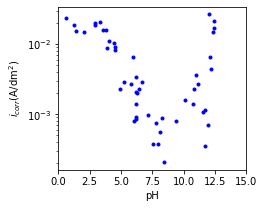

In [38]:
dficorr=dffull.dropna(subset=['i_corr'])
dficorr=dficorr[dficorr['i_corr_gap']<.25]
fig,ax1=plt.subplots(figsize=(3.37,3))

ax1.plot(dficorr.pH_med,dficorr.i_corr/.00126,'.b')
plt.yscale('log')
plt.ylabel(r'$i_{corr}$(A/dm$^2$)')
plt.xlabel('pH')

plt.xlim(0,15)
#plt.axvline(11)
fig.savefig(os.path.join(impath,'icorr.eps'),bbox_inches='tight')
fig.savefig(os.path.join(impath,'icorr.tiff'),bbox_inches='tight')

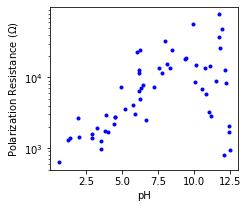

In [37]:
dfpr=dffull.dropna(subset=['polarization_resistance'])
fig,ax1=plt.subplots(figsize=(3.37,3))

plt.plot(dfpr.pH_med,dfpr.polarization_resistance,'b.')
plt.xlabel('pH')
plt.yscale('log')
plt.ylabel(r'Polarization Resistance ($\Omega$)' )
fig.savefig(os.path.join(impath,'PR.eps'),bbox_inches='tight')
fig.savefig(os.path.join(impath,'PR.tiff'),bbox_inches='tight')

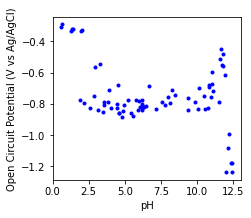

In [36]:
dfocp=dffull.dropna(subset=['E_oc_stable'])
fig,ax1=plt.subplots(figsize=(3.37,3))

plt.plot(dfocp.pH_med,dfocp.E_oc_stable,'b.')
plt.xlabel('pH')
#plt.yscale('log')
plt.ylabel(r'Open Circuit Potential (V vs Ag/AgCl)' )
fig.savefig(os.path.join(impath,'OCP.eps'),bbox_inches='tight')
fig.savefig(os.path.join(impath,'OCP.tiff'),bbox_inches='tight')

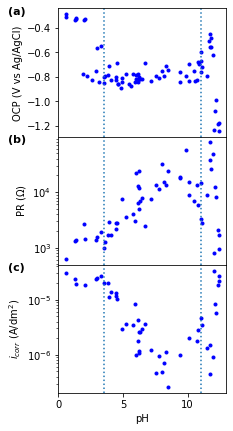

In [52]:
fig,(ax1,ax2,ax3)=plt.subplots(3,1,figsize=(3.5,7), sharex=True)

ax1.plot(dfocp.pH_med,dfocp.E_oc_stable,'b.')
ax1.set_xlabel('pH')
#plt.yscale('log')
ax1.set_ylabel(r'OCP (V vs Ag/AgCl)' )
ax1.set_xlim([0,13])
ax1.axvline(3.5,ls=':')
ax1.axvline(11,ls=':')
ax1.text(-.3,.95,'(a)',
        horizontalalignment='left',
        transform=ax1.transAxes, weight='semibold',fontsize=11)


ax2.plot(dfpr.pH_med,dfpr.polarization_resistance,'b.')
ax2.set_xlabel('pH')
ax2.set_yscale('log')
ax2.set_ylabel(r'PR ($\Omega$)' )
ax2.set_xlim([0,13])
ax2.axvline(3.5,ls=':')
ax2.axvline(11,ls=':')
ax2.text(-.3,.95,'(b)',
        horizontalalignment='left',
        transform=ax2.transAxes, weight='semibold',fontsize=11)

ax3.plot(dficorr.pH_med,dficorr.i_corr,'b.')
ax3.set_xlabel('pH')
ax3.set_yscale('log')
ax3.set_ylabel(r'$i_{corr}$ (A/dm$^2$)' )
ax3.set_xlim([0,13])
ax3.axvline(3.5,ls=':')
ax3.axvline(11,ls=':')
ax3.text(-.3,.95,'(c)',
        horizontalalignment='left',
        transform=ax3.transAxes, weight='semibold',fontsize=11)
fig.tight_layout()
fig.subplots_adjust( hspace=0)

fig.set_size_inches(3.5,6)
fig.savefig(os.path.join(impath,'corr_comp2.eps'),bbox_inches='tight')
fig.savefig(os.path.join(impath,'corr_comp2.tiff'),bbox_inches='tight')



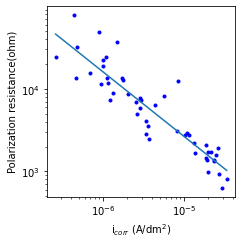

In [24]:
dfcomp=dffull.dropna(subset=['polarization_resistance'])
dfcomp=dfcomp.dropna(subset=['i_corr'])
dfcomp=dfcomp[dfcomp['i_corr_gap']<.25]
dfcomp=dfcomp[dfcomp['polarization_resistance']>0]




fig,(ax1)=plt.subplots(1,1,figsize=(3.37,3))
ax1.plot(dfcomp.i_corr,dfcomp.polarization_resistance,'b.')
ax1.set_yscale('log')
ax1.set_xscale('log')
linfit=scipy.stats.linregress(np.log10(dfcomp.i_corr),np.log10(dfcomp.polarization_resistance))
xx=np.linspace(np.min(dfcomp.i_corr),np.max(dfcomp.i_corr))
yy=linfit.slope*np.log10(xx)+linfit.intercept
plt.plot(xx,10**yy)
plt.ylabel('Polarization resistance(ohm)')
plt.xlabel(f'i$_{{corr}}$ (A/dm$^2$)')
plt.tight_layout()
figure=plt.gcf()
figure.set_size_inches(3.5,3.7)
fig.savefig(os.path.join(impath,'lpr_taf.eps'),bbox_inches='tight')
fig.savefig(os.path.join(impath,'lpr_taf.tiff'),bbox_inches='tight')

In [25]:
linfit.rvalue**2

0.8330737997775636

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


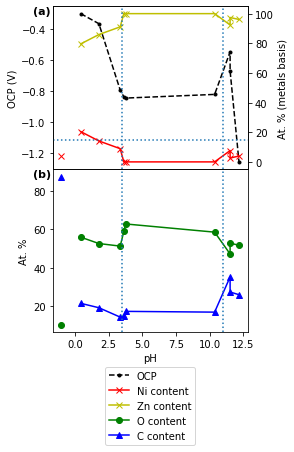

In [48]:
df4=pd.read_json(os.path.join(datarepo,'zinni3_1-2020-12-21\\data\\datebase.json'))

fig, (ax1,ax3)= plt.subplots(2,1,figsize=(3.37,5), sharex=True)
ax1.plot(df4.pH_med,df4.E_oc_stable,'.--k',label='OCP')
ax1.set_ylabel('OCP (V)')
#ax1.set_xlabel('pH')
ax3.set_xlabel('pH')
#ax1.legend(['OCP'])
ax2 = ax1.twinx()
ax2.plot(df4.pH_med,np.flipud([3.93,2.61,7.63,0,0,0,8.91,14.11,20.42]),'x-r',label='Ni content')
ax2.plot(df4.pH_med,np.flipud(np.subtract(100,[3.93,2.61,7.63,0,0,0,8.91,14.11,20.42])),'x-y',label='Zn content')
ax3.plot(df4.pH_med,np.flipud([51.66,52.89,47.16,58.56,62.84,58.92,51.27,52.61,55.95]),'o-g',label='O content')
ax3.plot(df4.pH_med,np.flipud([25.9,27.3,35.2,16.8,17.2,14.9,14.2,19.1,21.4]),'^-b',label='C content')
ax1.text(-.1,.95,'(a)',
        horizontalalignment='left',
        transform=ax1.transAxes, weight='semibold',fontsize=11)
ax3.text(-.1,.95,'(b)',
        horizontalalignment='left',
        transform=ax3.transAxes, weight='semibold',fontsize=11)
#ax2.legend(['Ni fraction of metals','O content','C content'],loc='upper center', bbox_to_anchor=(0.55, 0.9))
ax2.set_ylabel('At. % (metals basis)')
ax3.set_ylabel('At. %')
ax2.plot(-1,3.99,'x-r')
ax3.plot(-1,10.1,'o-g')
ax3.plot(-1,87.5,'^-b')
ax2.axhline(15,ls=':')
ax2.axvline(3.5,ls=':')
ax2.axvline(11,ls=':')
ax3.axvline(3.5,ls=':')
ax3.axvline(11,ls=':')
#plt.axvline(-1)

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
ax3.legend(lines + lines2+lines3, labels + labels2+labels3,loc='lower center', bbox_to_anchor=(.5, -.72)
          )
plt.subplots_adjust( hspace=0)
fig.set_size_inches(3.5,6)
fig.savefig(os.path.join(impath,'XPS_summary.eps'),bbox_inches='tight')
fig.savefig(os.path.join(impath,'XPS_summary.tiff'),bbox_inches='tight')



In [ ]:
df4=pd.read_json(os.path.join(datarepo,'zinni3_1-2020-12-21\\data\\datebase.json'))

fig, ax1 = plt.subplots(figsize=(3.37,5))
ax1.plot(df4.pH_med,df4.E_oc_stable,'.--k',label='OCP')
ax1.set_ylabel('OCP (V)')
ax1.set_xlabel('pH')
#ax1.legend(['OCP'])
ax2 = ax1.twinx()
ax2.plot(df4.pH_med,np.flipud([3.93,2.61,7.63,0,0,0,8.91,14.11,20.42]),'x-r',label='Ni content (metals basis)')
ax2.plot(df4.pH_med,np.flipud(np.subtract(100,[3.93,2.61,7.63,0,0,0,8.91,14.11,20.42])),'x-y',label='Zn content (metals basis)')
ax2.plot(df4.pH_med,np.flipud([51.66,52.89,47.16,58.56,62.84,58.92,51.27,52.61,55.95]),'o-g',label='O content')
ax2.plot(df4.pH_med,np.flipud([25.9,27.3,35.2,16.8,17.2,14.9,14.2,19.1,21.4]),'^-b',label='C content')

#ax2.legend(['Ni fraction of metals','O content','C content'],loc='upper center', bbox_to_anchor=(0.55, 0.9))
ax2.set_ylabel('At. %')

ax2.plot(-1,3.99,'x-r')
ax2.plot(-1,10.1,'o-g')
ax2.plot(-1,87.5,'^-b')
ax2.axhline(15,ls=':')
ax2.axvline(3.5,ls=':')
ax2.axvline(11,ls=':')
#plt.axvline(-1)

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2,loc='lower center', bbox_to_anchor=(.5, -.44))
fig.savefig(os.path.join(impath,'XPS_summary.eps'),bbox_inches='tight')
fig.savefig(os.path.join(impath,'XPS_summary.tiff'),bbox_inches='tight')